
Covered Call Strategy:
Final Capital: $11,078.49
Total Profit: $1,078.49
Profit Percentage: 10.78%

Call Debit Spread Strategy:
Final Capital: $9,475.53
Total Profit: $-524.47
Profit Percentage: -5.24%

Naked Call Strategy:
Final Capital: $11,573.40
Total Profit: $1,573.40
Profit Percentage: 15.73%

Put Credit Spread Strategy:
Final Capital: $11,048.93
Total Profit: $1,048.93
Profit Percentage: 10.49%

Naked Put Strategy:
Final Capital: $11,048.93
Total Profit: $1,048.93
Profit Percentage: 10.49%

Iron Condor Strategy:
Final Capital: $11,573.40
Total Profit: $1,573.40
Profit Percentage: 15.73%


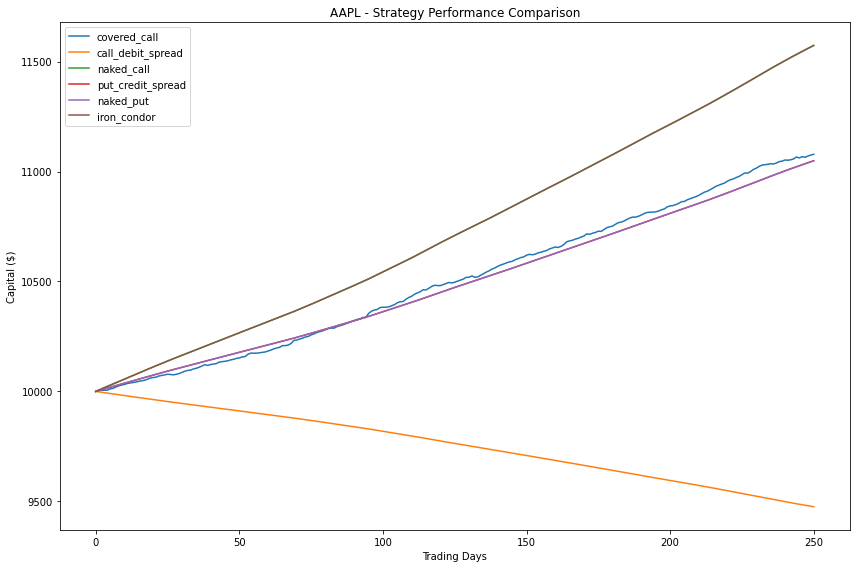

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict, Optional

class MultiStrategyOptionsSimulator:
    def __init__(self, ticker: str, initial_capital: float = 10000):
        """
        Initialize simulator with specific stock
        
        :param ticker: Stock ticker symbol
        :param initial_capital: Starting trading capital
        """
        self.ticker = ticker
        self.initial_capital = initial_capital
        self.stock_data = self._fetch_stock_data()
        self.strategies = {
            'covered_call': {'capital': initial_capital, 'trades': [], 'balance': [initial_capital]},
            'call_debit_spread': {'capital': initial_capital, 'trades': [], 'balance': [initial_capital]},
            'naked_call': {'capital': initial_capital, 'trades': [], 'balance': [initial_capital]},
            'put_credit_spread': {'capital': initial_capital, 'trades': [], 'balance': [initial_capital]},
            'naked_put': {'capital': initial_capital, 'trades': [], 'balance': [initial_capital]},
            'iron_condor': {'capital': initial_capital, 'trades': [], 'balance': [initial_capital]}
        }
    
    def _fetch_stock_data(self, period: str = '10d'):
        """
        Fetch historical stock data
        
        :param period: Time period for data
        :return: Pandas DataFrame with stock price data
        """
        stock = yf.Ticker(self.ticker)
        data = stock.history(period=period)
        return data
    
    def simulate_strategies(self, 
                             strike_delta: float = 0.05, 
                             option_days: int = 30):
        """
        Simulate multiple options strategies
        
        :param strike_delta: Percentage from current price for strike
        :param option_days: Days to option expiration
        """
        prices = self.stock_data['Close']
        
        for i in range(1, len(prices)):
            current_price = prices[i]
            prev_price = prices[i-1]
            
            # Covered Call
            self._simulate_covered_call(current_price, prev_price, strike_delta, i)
            
            # Call Debit Spread
            self._simulate_call_debit_spread(current_price, prev_price, strike_delta, i)
            
            # Naked Call
            self._simulate_naked_call(current_price, prev_price, strike_delta, i)
            
            # Put Credit Spread
            self._simulate_put_credit_spread(current_price, prev_price, strike_delta, i)
            
            # Naked Put
            self._simulate_naked_put(current_price, prev_price, strike_delta, i)
            
            # Iron Condor
            self._simulate_iron_condor(current_price, prev_price, strike_delta, i)
    
    def _simulate_covered_call(self, current_price, prev_price, strike_delta, index):
        strategy = self.strategies['covered_call']
        strike = current_price * (1 + strike_delta)
        premium = current_price * 0.02
        
        profit_loss = premium
        if current_price > strike:
            profit_loss += (strike - prev_price)
        else:
            profit_loss += (current_price - prev_price)
        
        strategy['capital'] += profit_loss
        strategy['balance'].append(strategy['capital'])
        strategy['trades'].append({
            'date': self.stock_data.index[index],
            'current_price': current_price,
            'profit_loss': profit_loss
        })
    
    def _simulate_call_debit_spread(self, current_price, prev_price, strike_delta, index):
        strategy = self.strategies['call_debit_spread']
        lower_strike = current_price * (1 + strike_delta)
        upper_strike = current_price * (1 + strike_delta * 1.5)
        
        # Simplified spread calculation
        max_profit = upper_strike - lower_strike
        premium_paid = current_price * 0.01
        
        profit_loss = -premium_paid
        if current_price > upper_strike:
            profit_loss += max_profit
        
        strategy['capital'] += profit_loss
        strategy['balance'].append(strategy['capital'])
        strategy['trades'].append({
            'date': self.stock_data.index[index],
            'current_price': current_price,
            'profit_loss': profit_loss
        })
    
    def _simulate_naked_call(self, current_price, prev_price, strike_delta, index):
        strategy = self.strategies['naked_call']
        strike = current_price * (1 + strike_delta)
        premium = current_price * 0.03
        
        profit_loss = premium
        if current_price > strike:
            profit_loss -= (current_price - strike)
        
        strategy['capital'] += profit_loss
        strategy['balance'].append(strategy['capital'])
        strategy['trades'].append({
            'date': self.stock_data.index[index],
            'current_price': current_price,
            'profit_loss': profit_loss
        })
    
    def _simulate_put_credit_spread(self, current_price, prev_price, strike_delta, index):
        strategy = self.strategies['put_credit_spread']
        upper_strike = current_price * (1 - strike_delta)
        lower_strike = current_price * (1 - strike_delta * 1.5)
        
        # Simplified spread calculation
        max_profit = upper_strike - lower_strike
        premium_received = current_price * 0.02
        
        profit_loss = premium_received
        if current_price < lower_strike:
            profit_loss -= max_profit
        
        strategy['capital'] += profit_loss
        strategy['balance'].append(strategy['capital'])
        strategy['trades'].append({
            'date': self.stock_data.index[index],
            'current_price': current_price,
            'profit_loss': profit_loss
        })
    
    def _simulate_naked_put(self, current_price, prev_price, strike_delta, index):
        strategy = self.strategies['naked_put']
        strike = current_price * (1 - strike_delta)
        premium = current_price * 0.02
        
        profit_loss = premium
        if current_price < strike:
            profit_loss -= (strike - current_price)
        
        strategy['capital'] += profit_loss
        strategy['balance'].append(strategy['capital'])
        strategy['trades'].append({
            'date': self.stock_data.index[index],
            'current_price': current_price,
            'profit_loss': profit_loss
        })
    
    def _simulate_iron_condor(self, current_price, prev_price, strike_delta, index):
        strategy = self.strategies['iron_condor']
        call_upper = current_price * (1 + strike_delta)
        call_lower = current_price * (1 + strike_delta * 1.5)
        put_lower = current_price * (1 - strike_delta)
        put_upper = current_price * (1 - strike_delta * 1.5)
        
        premium_received = current_price * 0.03
        max_risk = call_upper - call_lower
        
        profit_loss = premium_received
        if current_price > call_upper or current_price < put_lower:
            profit_loss -= max_risk
        
        strategy['capital'] += profit_loss
        strategy['balance'].append(strategy['capital'])
        strategy['trades'].append({
            'date': self.stock_data.index[index],
            'current_price': current_price,
            'profit_loss': profit_loss
        })
    
    def generate_performance_report(self):
        """
        Generate comparative performance report
        """
        report = {}
        for name, strategy in self.strategies.items():
            total_profit = strategy['capital'] - self.initial_capital
            report[name] = {
                'Final Capital': f'${strategy["capital"]:,.2f}',
                'Total Profit': f'${total_profit:,.2f}',
                'Profit Percentage': f'{(total_profit/self.initial_capital)*100:.2f}%'
            }
        return report
    
    def plot_strategy_performance(self):
        """
        Visualize capital progression for all strategies
        """
        plt.figure(figsize=(12, 8))
        for name, strategy in self.strategies.items():
            plt.plot(strategy['balance'], label=name)
        
        plt.title(f'{self.ticker} - Strategy Performance Comparison')
        plt.xlabel('Trading Days')
        plt.ylabel('Capital ($)')
        plt.legend()
        plt.tight_layout()
        plt.show()

def main():
    # Example usage with Apple stock
    simulator = MultiStrategyOptionsSimulator('AAPL', initial_capital=10000)
    simulator.simulate_strategies()
    
    # Generate and display performance report
    report = simulator.generate_performance_report()
    for strategy, metrics in report.items():
        print(f"\n{strategy.replace('_', ' ').title()} Strategy:")
        for key, value in metrics.items():
            print(f"{key}: {value}")
    
    # Plot strategy performances
    simulator.plot_strategy_performance()

if __name__ == "__main__":
    main()

In [1]:
import numpy
print(numpy.__version__)

1.24.4


In [39]:
prefix = ""
range_val = strs[0]

for i in range(0,len(range_val)):
    count = 0
    counter = ""
    for e in strs:
        
        if count == 0:
            counter = e[i]
            count += 1
            print(counter)
        else:
            if counter == e[i]:
                count += 1


    if count == len(strs):
        prefix = prefix + e[i]

In [40]:
count == len(strs)

True

In [41]:
prefix

''

In [ ]:
x = 1221
x_str = list(str(x))
x_str[-1:]